<a href="https://colab.research.google.com/github/kaartheeka/Machine-learning-projects/blob/main/Copy_of_kaartheeka_IBM_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('crop.csv')  #reading the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape #shows how many rows and columns r there

(2200, 8)

In [ ]:
df.info()  #shows null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()  #numerical data display ,mean,std,min etc

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.columns  #displays what all columns r there(index values)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df["label"].unique()  #shows all labels with out repeating all unque

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df["label"].value_counts()  #shows how many labels are there

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


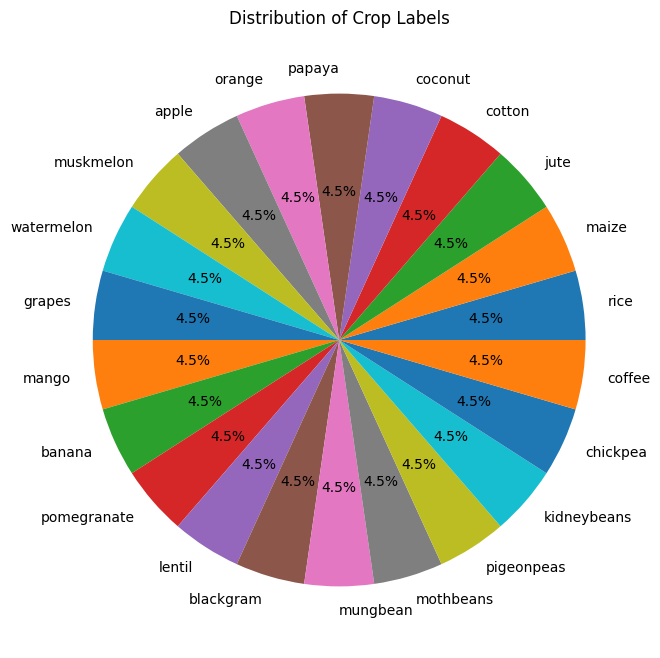

In [ ]:
label_count = df["label"].value_counts()

#plot pie chart

plt.figure(figsize=(8,8))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')
plt.title('Distribution of Crop Labels')
plt.show()
#

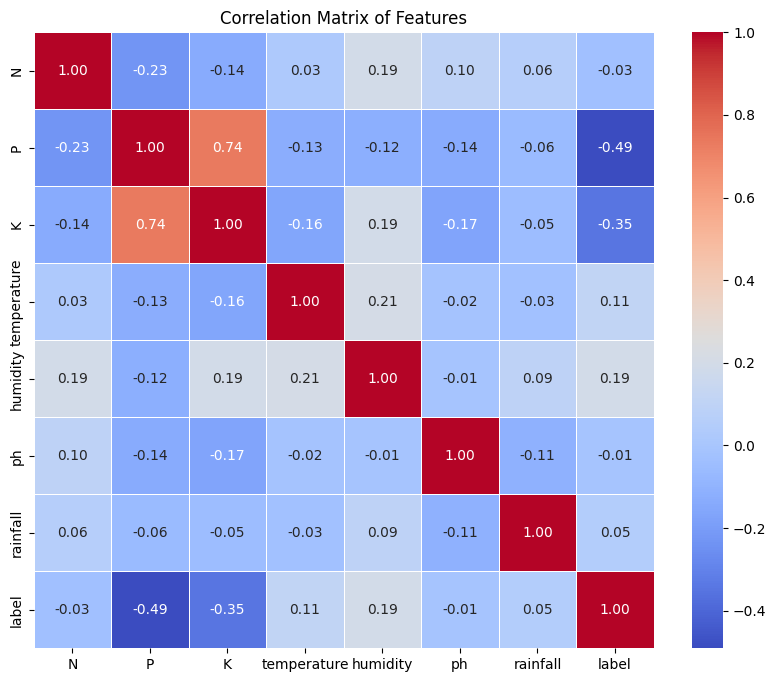

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

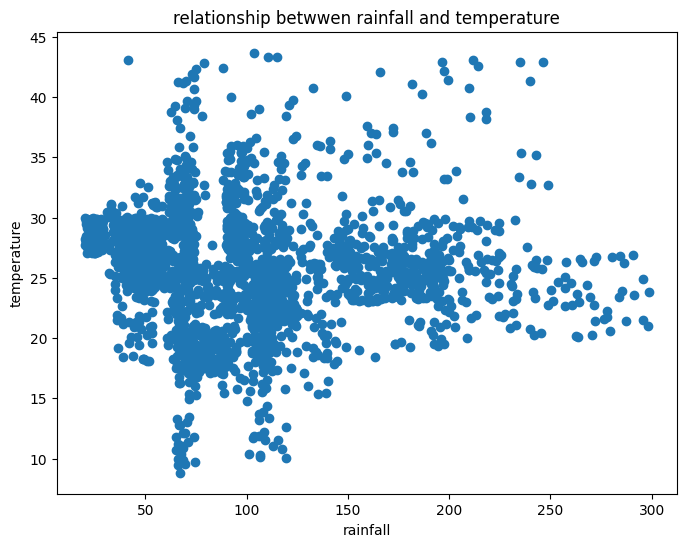

In [ ]:

#plot scatter plot

plt.figure(figsize=(8,6))
plt.scatter(df['rainfall'], df['temperature'])
plt.xlabel('rainfall')
plt.ylabel('temperature')
plt.title('relationship betwwen rainfall and temperature')
plt.show()
#

In [ ]:
df['temperature'].describe()

,temperature
count,2200.000000
mean,25.616244
std,5.063749
min,8.825675
25%,22.769375
50%,25.598693
75%,28.561654
max,43.675493


In [ ]:
df['rainfall'].describe()

,rainfall
count,2200.000000
mean,103.463655
std,54.958389
min,20.211267
25%,64.551686
50%,94.867624
75%,124.267508
max,298.560117


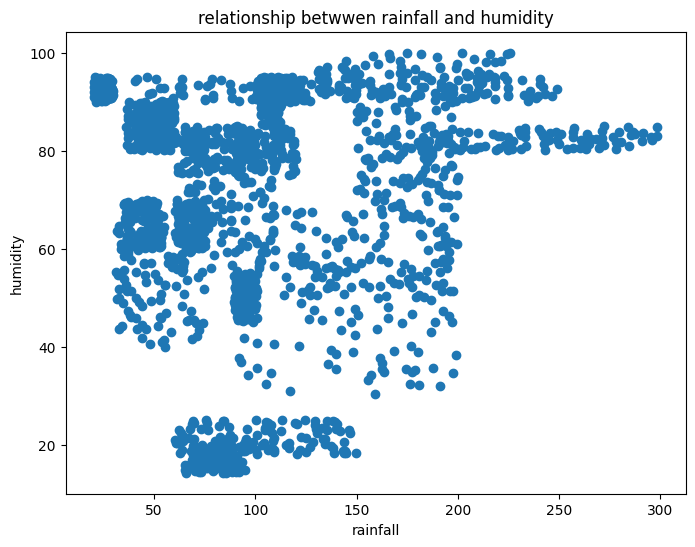

In [ ]:
#plot scatter plot

plt.figure(figsize=(8,6))
plt.scatter(df['rainfall'], df['humidity'])
plt.xlabel('rainfall')
plt.ylabel('humidity')
plt.title('relationship betwwen rainfall and humidity')
plt.show()

modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#

In [ ]:
class_labels = df['label'].unique().tolist()
class_labels

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()                          #hyperparameter tuning ,encoding
df['label'] = label_encoder.fit_transform(df['label'])

In [ ]:
df['label']

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Set up the GridSearchCV with cross-validation and parallel processing
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # Use all available processors
    verbose=2
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9960227272727273


In [ ]:
best_rf = grid_search.best_estimator_
test_score = best_rf.score(x_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.9931818181818182


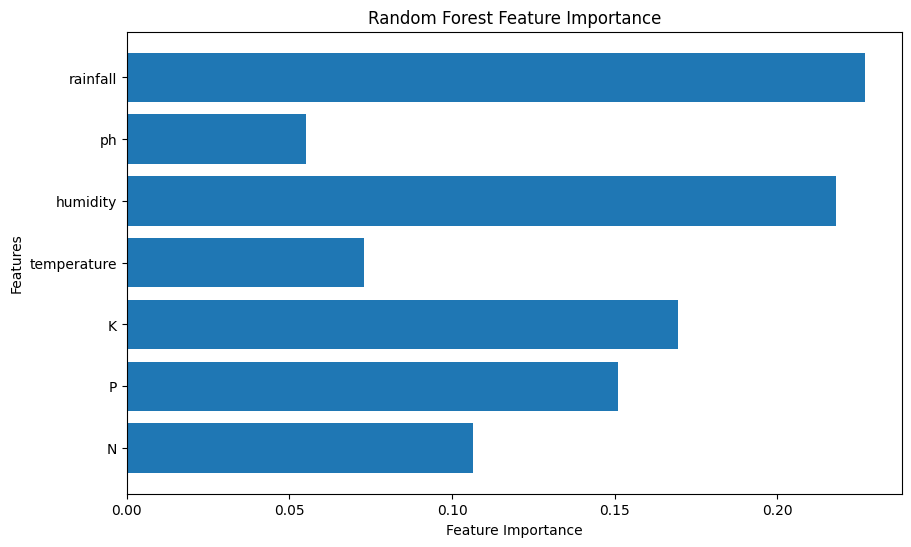

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = x.columns
plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


Accuracy: 0.99
F1-Score: 0.99


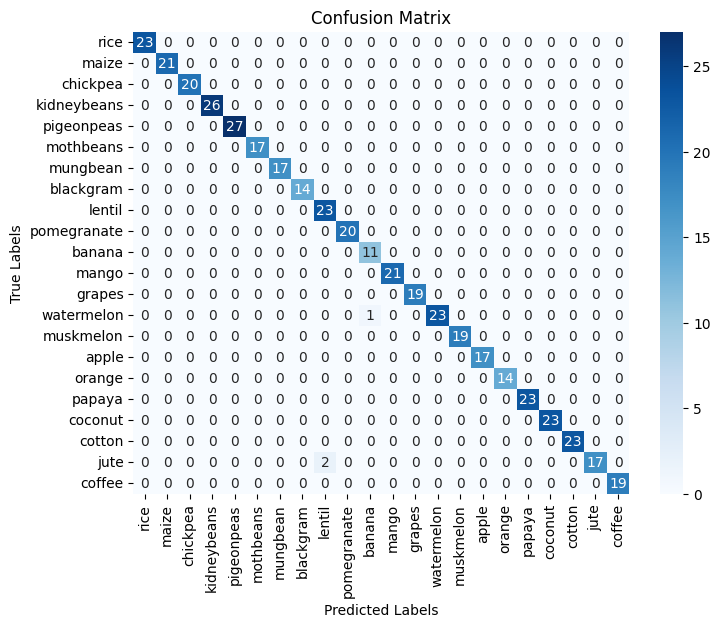


Classification Report:
               precision    recall  f1-score   support

        rice       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        26
  pigeonpeas       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
 pomegranate       1.00      1.00      1.00        20
      banana       0.92      1.00      0.96        11
       mango       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        19
       apple       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
  

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


# Assuming you have trained the model and have predictions
# Make predictions on the test set
y_pred = grid_search.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1-score (for each class and overall)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
print(f"F1-Score: {f1:.2f}")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optional: Classification report for more details on precision, recall, and F1-score per class
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))


In [ ]:
# Initialize an empty dictionary for label encoding
label_dict = {}

# Enumerate through class_labels and assign each label a unique index
for index, label in enumerate(class_labels):
    label_dict[label] = index

# Output the resulting dictionary
print(label_dict)


{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [ ]:
features_data = {'columns': list(x.columns)}

pred_series = pd.Series(np.zeros(len(features_data['columns'])), index=features_data['columns'])
pred_series


,0
N,0.0
P,0.0
K,0.0
temperature,0.0
humidity,0.0
ph,0.0
rainfall,0.0


In [ ]:
pred_series['N'] = 80
pred_series['P'] = 40
pred_series['K'] = 50
pred_series['temperature'] = 20
pred_series['humidity'] = 76
pred_series['ph'] = 6.5
pred_series['rainfall'] = 200


In [ ]:
output = best_rf.predict([pred_series.values])[0]
print("recommended crop:", class_labels[output])

recommended crop: jute


#therefore the recommended crop is jute